# Tracking rainforest development in the amazon rainforest between 2010 and 2020

Within this project we are trying to show and calculate forest loss in the South American Amazon rainforest within a ten year period. We will use the land cover data cube 
(https://s3.eu-central-1.amazonaws.com/deep-esdl-public/LC-1x2160x2160-1.0.0.levels/0.zarr) that relies on data provided and summarised by the Université Catholique de Louvain.
It is widely known that the amazon rainforest decreases by a large amount of trees every year, but we wanted to see, if it is possible to see that large decrease within the 
ten years of the data cube as well. As a tool to develope our model, we created three modules to process the data.
To visualize that change, we have to modify the data cube in such a way that it is possible with the Laptops that we have. A test cube was first created as a subset of the original cube. Firstly to decrease the size and secondly to only look at the amazon region instead of the whole cube. Eventually we selected following extent as our research area: XXXX
sample cube, extent, sources at the end

A few things are to be noted before putting the results into perspective: An error of about 5 % was proclaimed for the data set.
The way the methodology to create the data was designed, not all changed between different LCCS categories are sometimes detected, putting the results into a different perspective.
It is also worth nothing, that abrupt changes are better captured than gradual ones. Since the deforestation is a relatively drastic event into the landscape, one should think that it will definitely show in the data. The base of the maps that created the data cube is a 300m spatial resolution, which was calculated off 1km pixels, meaning any changes under 1km will not be displayed.
Also changes occurring in the 2014 - 2015 period are reduced to forest changes only. It is not further specified if that includes only loss of forest or gain of forest as well.
In the category that we used for the detection of rainforest (tree_broadleaved_evergreen_closed_to_open), if the amount of broadleaved, evergreen forest in that pixel is between 16 and 100%, it will be classified into that category. It is therefore possible that in an "tree_broadleaved_evergreen_closed_to_open" pixel, only 20% are actually broadleaved evergreen trees. Gaps were filled with nearest-neighbour method that has its own positive and negative aspects.
The total tree fraction of a pixel that has >0% trees in it is always assigned to a single tree type. In our class used, it means that the >15% broadleaf, evergreen trees will get the broad-leaved evergreen tree type. 90% in that class group are actually broadleaved-evergreen trees while 10% are natural grasses.
http://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-Ph2-PUGv2_2.0.pdf


### Start by loading necessary packages:

In [9]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
#Pkg.resolve()

include("src/rainforest_lib.jl")
using .Rainforestlib
include("src/LCCSClasses.jl")
using .LCCSClasses


  Activating project at `~/git/spatio_temporal_data-rainforest_development`


### Get Datacube and filter spatially and temporally
The module "Rainforestlib", contains the most important codes to process the datacube and to create images and plots as results. 
Here we first read in the Datacube and filter it to you scope of interest. Dates of the data cube are defined to the maximum possible values (2010 until 2020). The extent was set to fit with South America.

In [3]:
# take desired lcc path/url -> set fine, medium or coarse to decide how finegrained the underlying input data should be
# long calculation time needs to be expected for value `fine` 
import JSON
lcc_url = JSON.parsefile("src/datacube_paths.json")["coarse"]

# read in the desired datacube
lcc = Rainforestlib.get_lc_datacube(lcc_url)

#geo_spatial resolution. equator is 40075km long
geo_res = 40075 / length(lcc.lon) 
println("The geospatial resolution of the loaded datacube is $(geo_res) km^2 per pixel")

# limit space to southamerica, limit time from 2010 to 2020 
using Dates
filtered_dc = Rainforestlib.spatio_temporal_filter(lcc; lon_bounds=(-82, -34), lat_bounds= (-56.5,13), time_bounds = (Date(2010), Date(2021)))

The geospatial resolution of the loaded datacube is 9.895061728395062 km^2 per pixel


YAXArray with the following dimensions
lon                 Axis with 540 Elements from -81.95416666666665 to -34.04305555555554
lat                 Axis with 782 Elements from 12.934722222222222 to -56.4875
time                Axis with 11 Elements from 2010-01-01T00:00:00 to 2020-01-01T00:00:00
name: lccs_class
Total size: 4.43 MB


### Read out data from LCCSClasses and create sets for normal forest, rainforest and a combined set.

In [4]:
rainforest_classes = Set(LCCSClasses.categories["rainforest"].lccs_classes)
forest_classes = Set(LCCSClasses.categories["forest"].lccs_classes)
all_forest_classes = union(forest_classes, rainforest_classes)

Set{String} with 13 elements:
  "tree_needleleaved_evergreen_open"
  "tree_needleleaved_deciduous_closed"
  "tree_needleleaved_deciduous_open"
  "tree_needleleaved_deciduous_closed_to_open"
  "tree_broadleaved_deciduous_open"
  "tree_broadleaved_deciduous_closed"
  "tree_broadleaved_evergreen_closed_to_open"
  "tree_cover_flooded_saline_water"
  "tree_needleleaved_evergreen_closed"
  "tree_mixed"
  "tree_broadleaved_deciduous_closed_to_open"
  "tree_cover_flooded_fresh_or_brakish_water"
  "tree_needleleaved_evergreen_closed_to_open"

### First Overview

To begin, let's get an overview of the nature of South America. For this we have divided the different LCCS classes into categories (in LCCSClasses.jl) and represent these categories by color in a diagram.

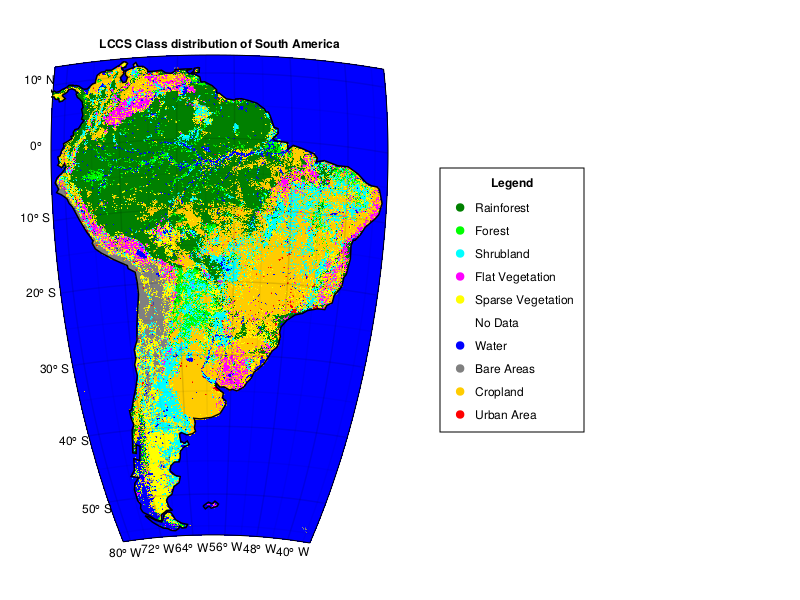

In [48]:
include("src/rainforest_lib.jl")
using .Rainforestlib
using Colors


custom_colormap = [
    RGB(0.0, 0.5, 0.0),
    RGB(0.0, 1.0, 0.0),
    RGB(0.0, 1.0, 1.0),
    RGB(1.0, 0.0, 1.0), 
    RGB(1.0, 1.0, 0.0), 
    RGB(1.0, 1.0, 1.0),  
    RGB(0.0, 0.0, 1.0),  
    RGB(0.5, 0.5, 0.5),  
    RGB(1.0, 0.8, 0.0), 
    RGB(1.0, 0.0, 0.0)
]

Rainforestlib.build_figure_all_classes(
    filtered_dc; 
    title="LCCS Class distribution of South America", 
    set_nan = true,
    colormap = custom_colormap,
    colorrange = (0.1, 1.0)
)

### Creation of a map of South America's rainforest in 2010.

┌ Warning: Could not find font regular, using TeX Gyre Heros Makie
└ @ Makie /home/olaf/.julia/packages/Makie/iECbF/src/conversions.jl:993


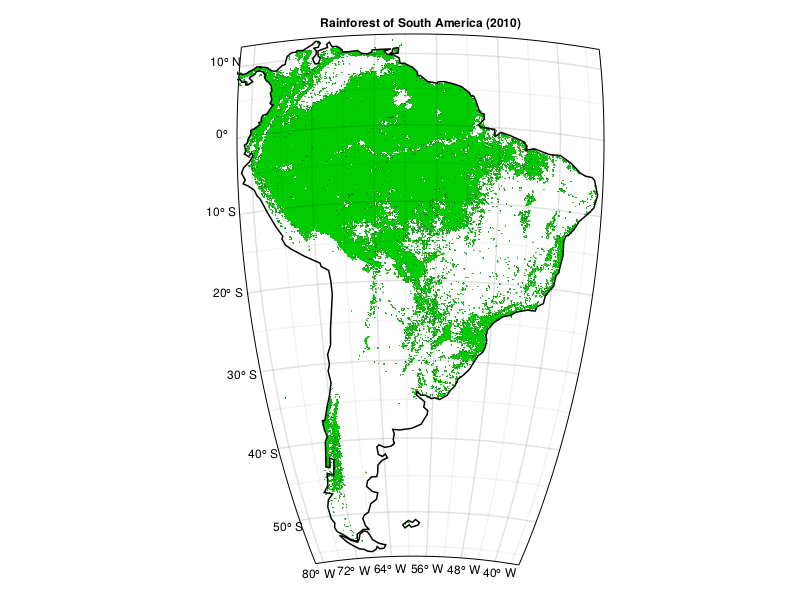

In [4]:
using Colors

#build a map of the rainforest in south america (2010, due to default "timestep" value)
local_figure = Rainforestlib.build_figure_by_lcc_classes(
    filtered_dc, 
    rainforest_classes; 
    title = "Rainforest of South America (2010)",
    color = RGB(0.0, 0.8, 0.0),  # Green
    set_nan = true
)

### Create a map of South America's forests (rainforest & forest) in 2010 including a legend of all forest relating lccs classes.

In [ ]:
using Colors

local_figure = Rainforestlib.build_figure_by_lcc_classes(
    filtered_dc, 
    all_forest_classes; 
    color=RGB(0.0, 1.0, 0.0),
    set_nan = true,
    title = "Forest of South America in 2010",
    legend = "LCCS Class"
)

### Display the distribution of forest and rainforest

To get a better understanding in the distribution of forest and rainforest, we introduced two categories. The "rainforest" category, which only contains the "tree_broadleaved_evergreen_closed_to_open" lccs class, and the "forest" category, which contains all the other forest related lccs classes.

In [ ]:
using Colors

custom_colormap = [
    RGB(0.0, 0.9, 0.0),  # Green
    RGB(0.0, 0.0, 0.9),  # Blue
]


searched_classes = filter(p -> first(p) == "rainforest" || first(p) == "forest", Rainforestlib.LCCSClasses.categories)
searched_classes = sort(searched_classes, by = x -> x[2])


local_figure = Rainforestlib.build_figure_by_categories(
    filtered_dc, 
    searched_classes; 
    colormap = custom_colormap, 
    title="Rainforest of South America in 2010",
    legend=true
)

### Rainforest development over time

The next step was to show the extent of the rainforest in South America in the different years. For this purpose, images are created, each showing the extent of the rainforest. In addition, the total number of pixels of the rainforest is printed. This shows an interesting result, which does not coincide with our investigations. According to our calculations, the area of the rainforest remains the same or even increases slightly. This is in absolute contrast to all publications about the development of the rainforest in South America.

Number of rainforest pixels in 2010-01-01T00:00:00: 72530.0
Diff to last: 72530.0


Number of rainforest pixels in 2011-01-01T00:00:00: 72493.0
Diff to last: -37.0


Number of rainforest pixels in 2012-01-01T00:00:00: 72500.0
Diff to last: 7.0


Number of rainforest pixels in 2013-01-01T00:00:00: 72496.0
Diff to last: -4.0


Number of rainforest pixels in 2014-01-01T00:00:00: 72550.0
Diff to last: 54.0


Number of rainforest pixels in 2015-01-01T00:00:00: 72549.0
Diff to last: -1.0


Number of rainforest pixels in 2016-01-01T00:00:00: 72569.0
Diff to last: 20.0


Number of rainforest pixels in 2017-01-01T00:00:00: 72564.0
Diff to last: -5.0


Number of rainforest pixels in 2018-01-01T00:00:00: 72527.0
Diff to last: -37.0


Number of rainforest pixels in 2019-01-01T00:00:00: 72552.0
Diff to last: 25.0


Number of rainforest pixels in 2020-01-01T00:00:00: 72558.0
Diff to last: 6.0


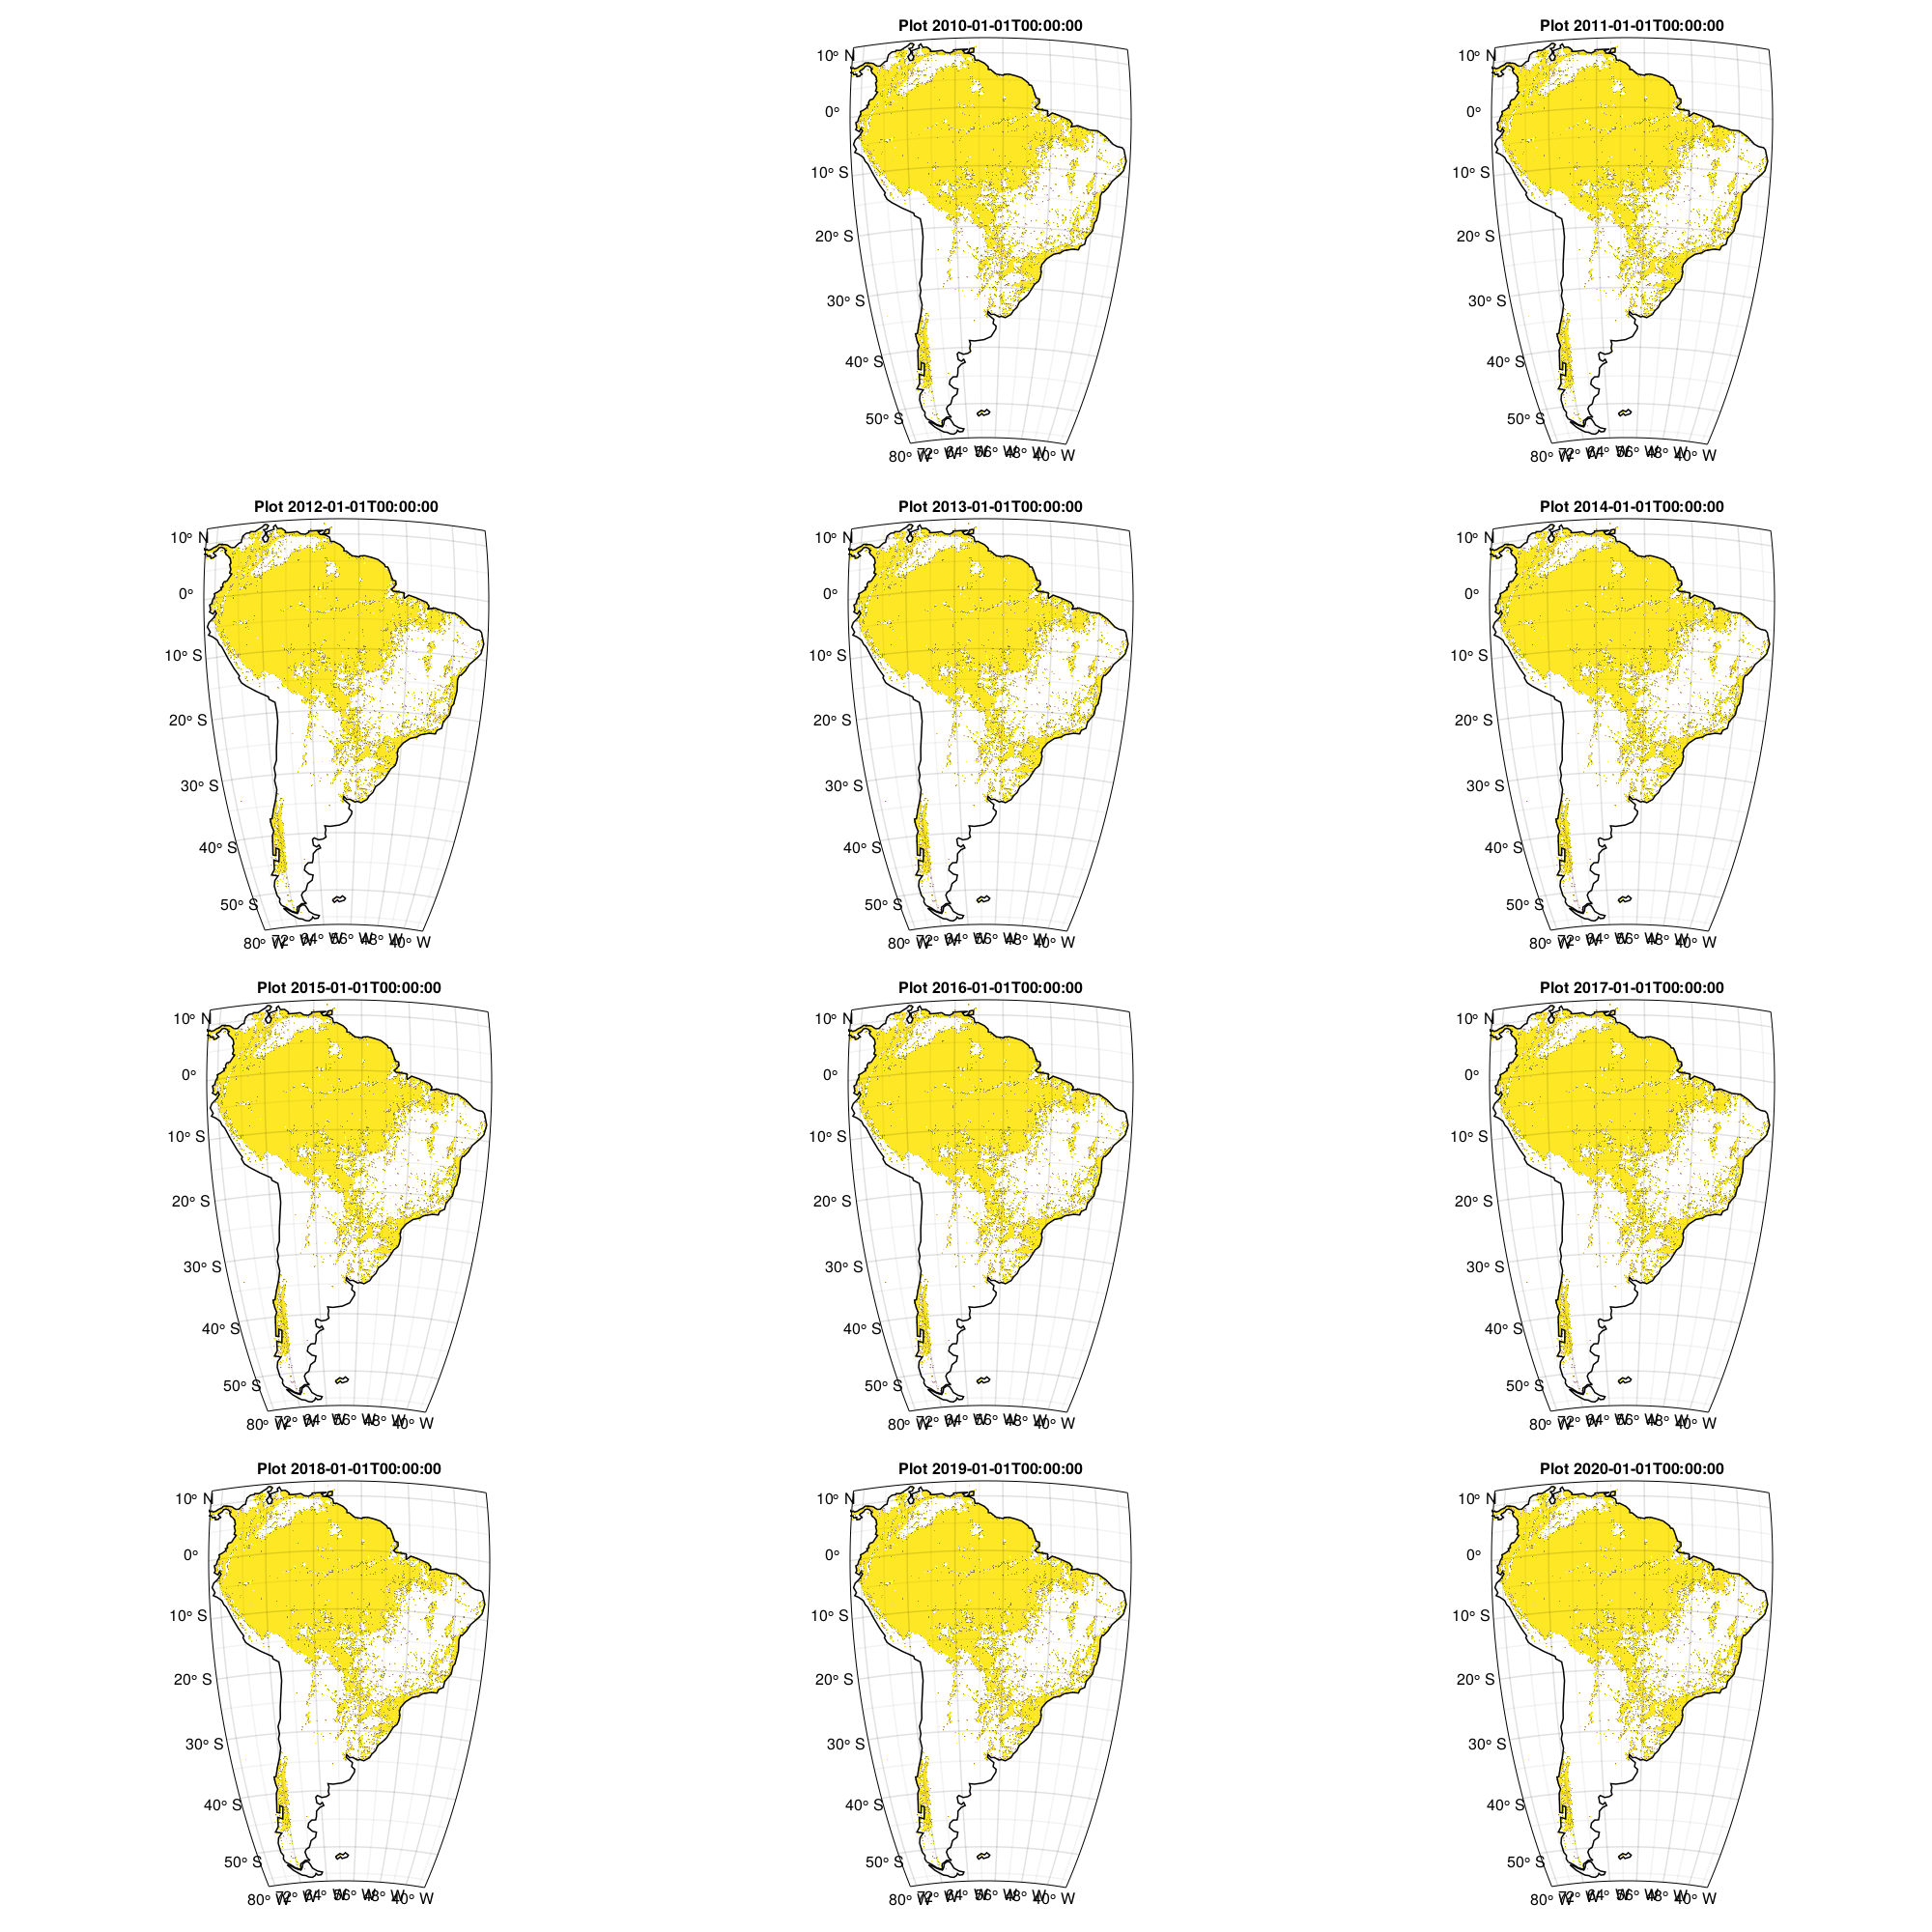

In [69]:
Rainforestlib.build_plots_over_time(filtered_dc, rainforest_classes; resolution=(2000, 2000), set_nan = true)

### Rainforest development over time (differences)

The next step was to show the changes in the development of the Amazon rainforest. In the end it is a clearer representation of the same facts as in the step before. For this purpose, images are created, each showing the differences from the previous year.
The resulting images are saved in the folder 'imgs'. In addition, the total area of the rainforest is printed.

In [18]:
Rainforestlib.build_diff_figures_over_time(
    filtered_dc, 
    Rainforestlib.LCCSClasses.categories["rainforest"], 
    "imgs"; 
    resolution = (1000, 1000), 
    geo_res = geo_res
)

Rainforest in 2010-01-01T00:00:00: 717688 km^2


Rainforest in 2011-01-01T00:00:00: 717322 km^2


Rainforest in 2012-01-01T00:00:00: 717391 km^2


Rainforest in 2013-01-01T00:00:00: 717352 km^2


Rainforest in 2014-01-01T00:00:00: 717886 km^2


Rainforest in 2015-01-01T00:00:00: 717876 km^2


Rainforest in 2016-01-01T00:00:00: 718074 km^2


Rainforest in 2017-01-01T00:00:00: 718025 km^2


Rainforest in 2018-01-01T00:00:00: 717659 km^2


Rainforest in 2019-01-01T00:00:00: 717906 km^2


Rainforest in 2020-01-01T00:00:00: 717965 km^2


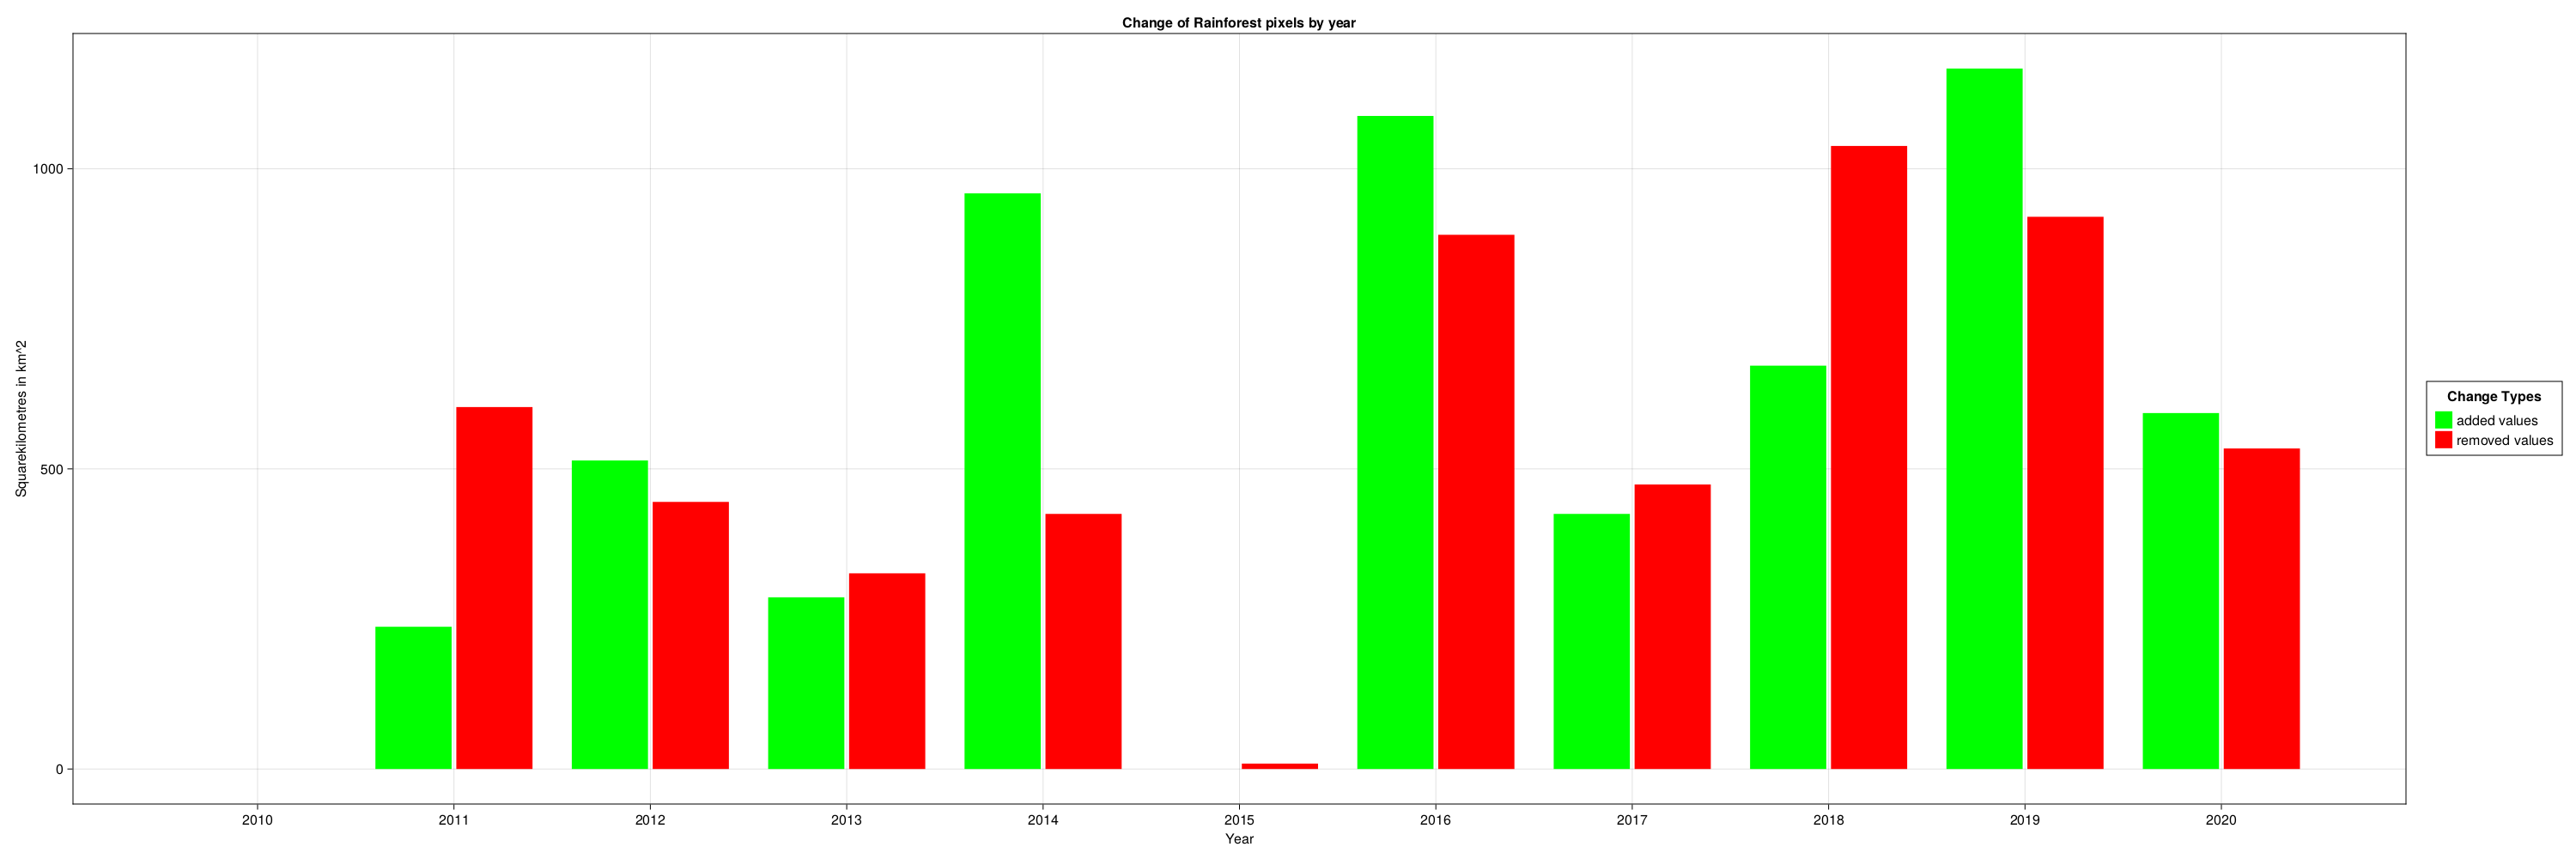

In [82]:
# build a bar chart with rainforest changes
Rainforestlib.rainforest_diff_over_time(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"], geo_res; resolution = (3000, 1000), gradual_diff = true)

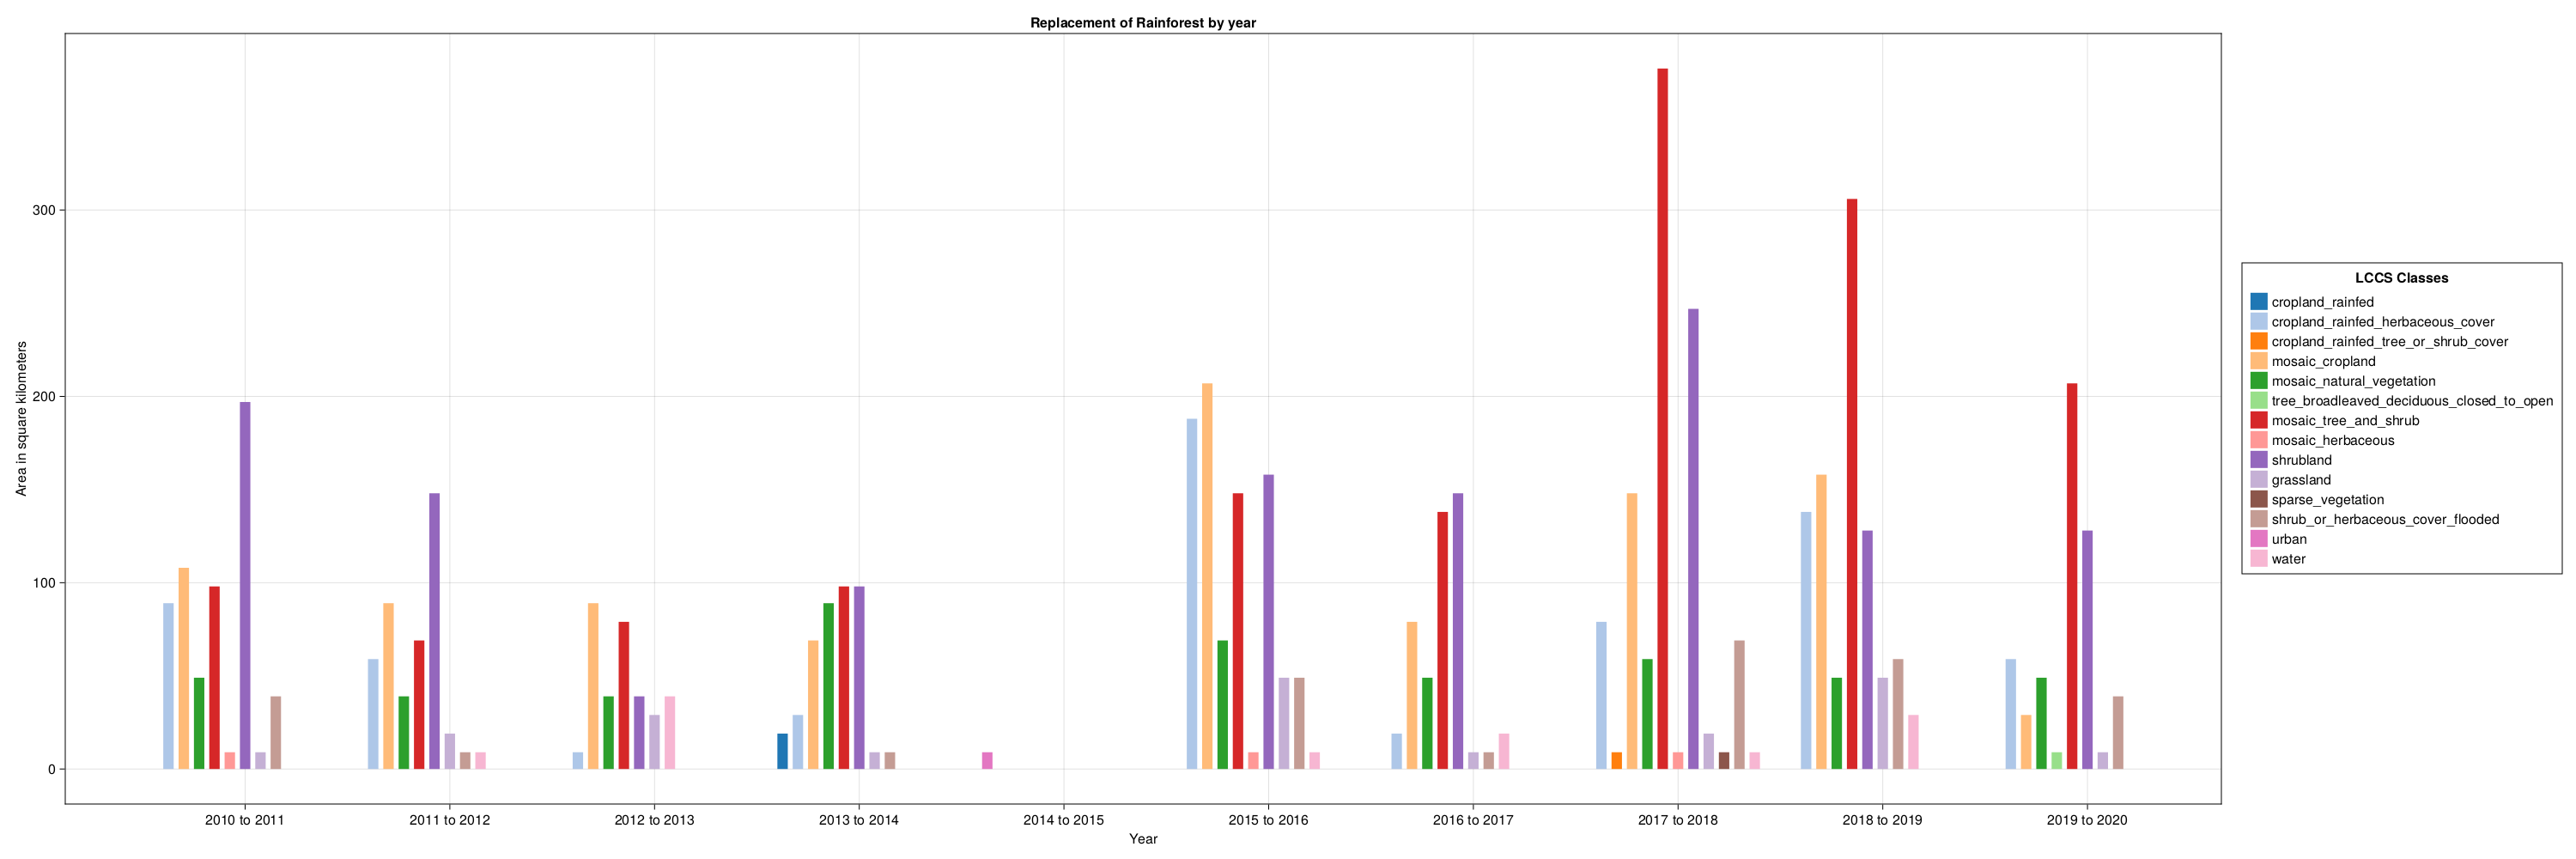

In [92]:
include("src/rainforest_lib.jl")
using .Rainforestlib

Rainforestlib.build_replacement_figure(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"], geo_res; resolution = (3000, 1000))

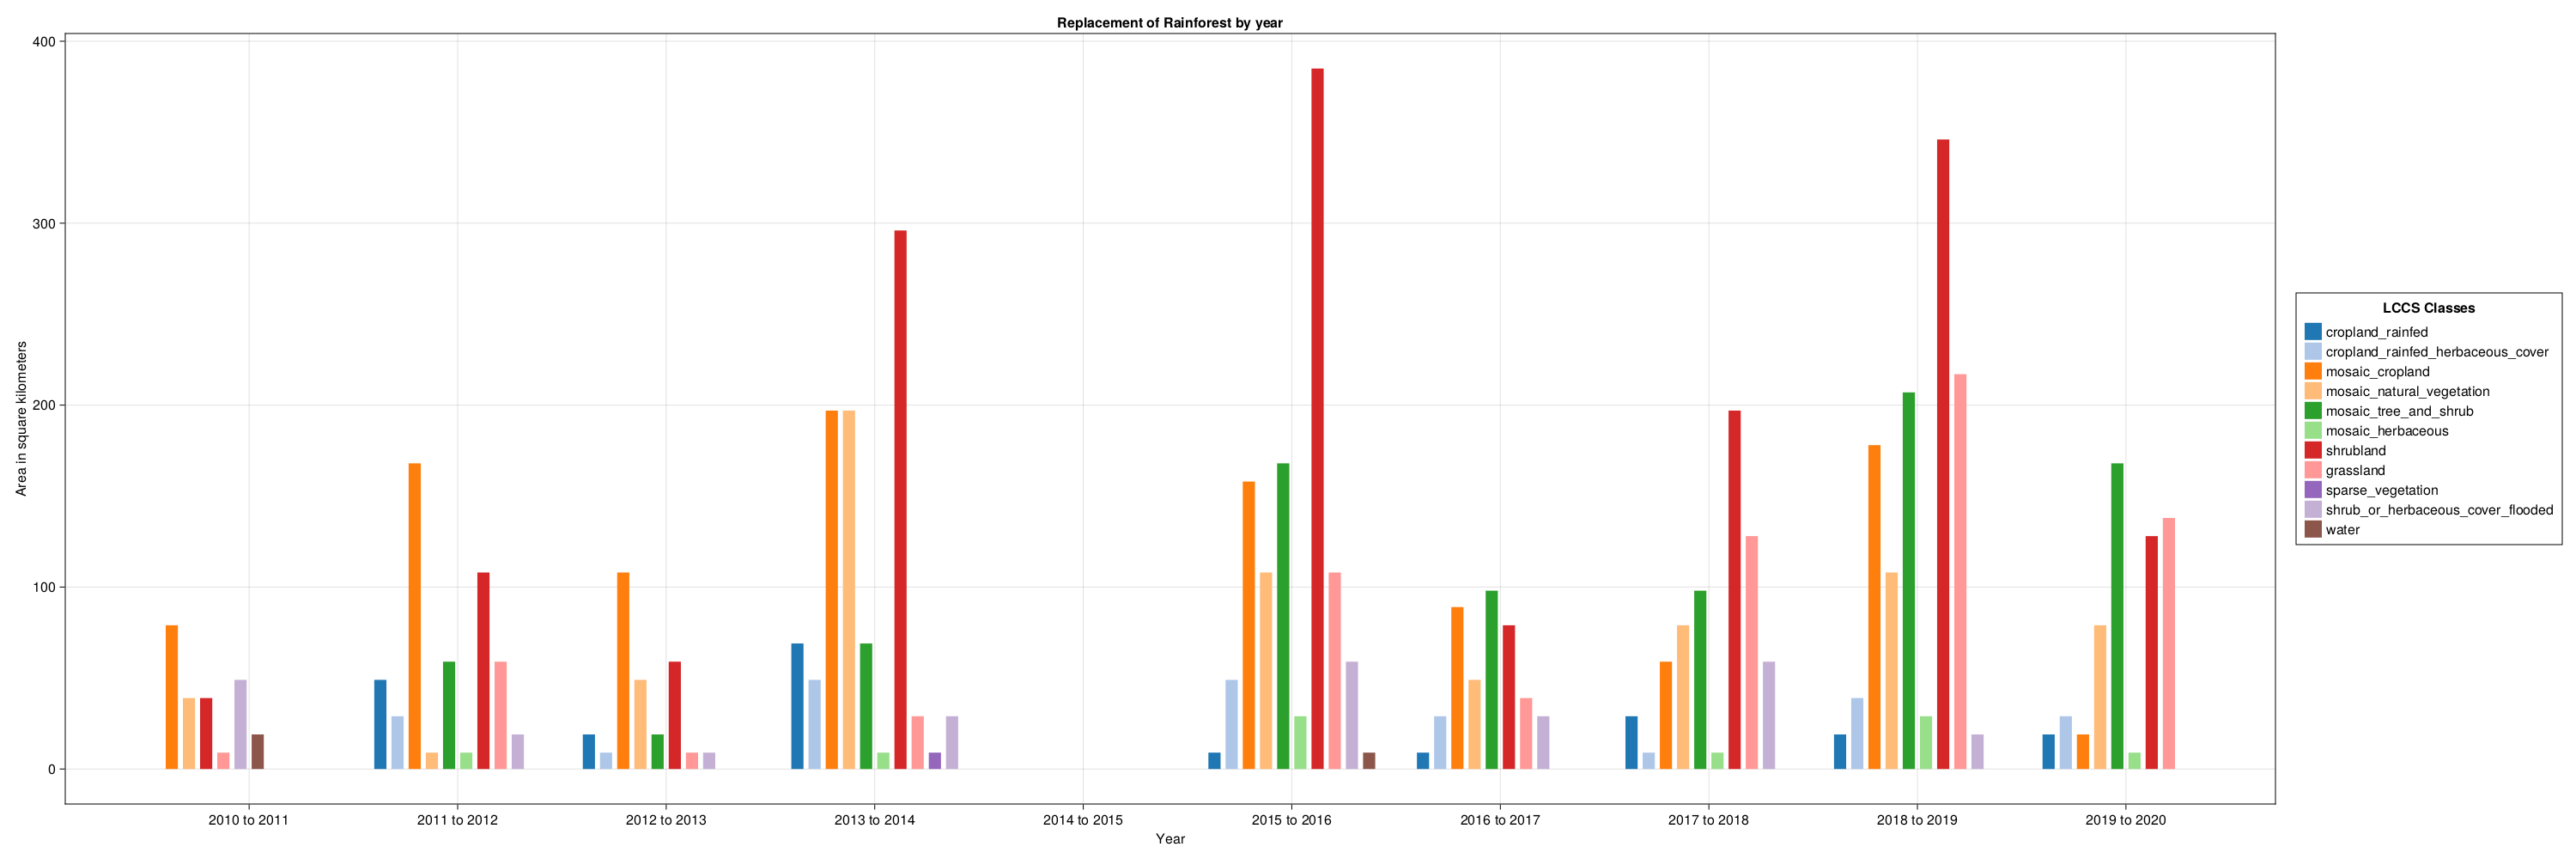

In [94]:
# this is the reverse, so it shows was there BEFORE it was turned into rainforest

Rainforestlib.build_replacement_figure(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"], geo_res; resolution = (3000, 1000), reverse = true)

We additionally tried to use the function that we used for the whole area, to see for a smaller area within a soy growing area.

In [ ]:
using Zarr
using YAXArrays

lc = Rainforestlib.get_lc_datacube()

filtered_dc = Rainforestlib.rough_spatial_filter(lc; time_bounds = (Date(2010), Date(2021)))

small_soy_region_dc = Rainforestlib.rough_spatial_filter(
    lc;
    lon_bounds = (-57, -54),
    lat_bounds = (-10, -6), 
    time_bounds = (Date(2010), Date(2021))
)

In [ ]:
using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can me changed by setting 

using Colors, ColorSchemes

custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # Red
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(0.0, 1.0, 0.0)   # Green
]

local_figure = Rainforestlib.build_figure_by_lcc_classes(small_soy_region_dc, all_forest_values; colormap = custom_colormap, colorrange = (0,1), set_nan = true)

In [ ]:
# build one figure with diffs for each timestep

Rainforestlib.build_diff_figures_over_time(small_soy_region_dc, Rainforestlib.LCCSClasses.categories["rainforest"], "imgs"; name_base = "diff_first_year_small_soy_region", resolution = (3000, 3000))


In addition to the soy growing area, we also selected an area, where we found a significant loss of forest during a first quick research on http://maps.elie.ucl.ac.be/CCI/viewer/index.php.

In [ ]:
using Zarr
using YAXArrays

forestloss_region = Rainforestlib.spatio_temporal_filter(
    lcc;
    lon_bounds = (-65, -63),
    lat_bounds = (-10, -9), 
    time_bounds = (Date(2010), Date(2021))
)

In [ ]:
using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can me changed by setting 

using Colors, ColorSchemes

custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # Red
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(0.0, 1.0, 0.0)   # Green
]

local_figure = Rainforestlib.build_figure_by_lcc_classes(forestloss_region, all_forest_values; colormap = custom_colormap, colorrange = (0,1), set_nan = true)

In [ ]:
# build one figure with diffs for each timestep

Rainforestlib.build_diff_figures_over_time(forestloss_region_region, Rainforestlib.LCCSClasses.categories["rainforest"], "imgs"; name_base = "diff_first_year_small_soy_region", resolution = (3000, 3000))

summary/conclusion
- rainforst loss visible
- depending on resolution and area where you are in the amazon. Change not everywhere equal
- keeping errors explained at the beginning in mind
- show results of pixel changes, explain why the results are the way they are
- explain bar charts further, maybe pick one or two examples
- differences between whole amazon, "small soy area" and "forestloss_region"

sources: https://www.faszination-regenwald.de/info-center/zerstoerung/flaechenverluste/

http://maps.elie.ucl.ac.be/CCI/viewer/index.php

http://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-Ph2-PUGv2_2.0.pdf

Mahecha, M. D., Gans, F., Brandt, G., Christiansen, R., Cornell, S. E., Fomferra, N., Kraemer, G., Peters,
J., Bodesheim, P., Camps-Valls, G., Donges, J. F., Dorigo, W., Estupinan-Suarez, L. M., Gutierrez-Velez,
V. H., Gutwin, M., Jung, M., Londoño, M. C., Miralles, D. G., Papastefanou, P., and Reichstein, M.:
Earth system data cubes unravel global multivariate dynamics, Earth Syst. Dynam., 11, 201–234,
https://doi.org/10.5194/esd-11-201-2020, 2020.

Boulton, C.A., Lenton, T.M. & Boers, N. Pronounced loss of Amazon rainforest resilience since the
early 2000s. Nat. Clim. Chang. 12, 271–278 (2022). https://doi.org/10.1038/s41558-022-01287-8

Nobre, C. A., Sampaio, G., Borma, L. S., Castilla-Rubio, J. C., Silva, J. R., & Cardoso, M. (2016). Land-use
and climate change risks in the amazon and the need of a novel sustainable development paradigm.
Proceedings of the National Academy of Sciences, 113(39), 10759-10768.
https://doi.org/10.1073/pnas.1605516113